In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import folium 
import json
import math
from math import radians, cos, sin, asin, sqrt
import itertools
import statistics as stats
from statistics import mean

import bokeh

print('All imported!')

All imported!


In [2]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row, column
from ipywidgets import interact
from bokeh.models import ColumnDataSource, FactorRange, Select, CustomJS
from bokeh.plotting import output_file, save, figure, show


output_notebook()

Loading BokehJS ...

In [3]:
merged_data = pd.read_csv('merged_data.csv')
mdata = merged_data[merged_data.Year != 2025]
print('Data read!')

Data read!


In [4]:
mdata.loc[:,'Month number'] = mdata['Month'].replace({
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
})
mdata.head()

/var/folders/nm/8h6trdzs11b4x2t2ypm38l0w0000gn/T/ipykernel_36988/965317985.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mdata.loc[:,'Month number'] = mdata['Month'].replace({
/var/folders/nm/8h6trdzs11b4x2t2ypm38l0w0000gn/T/ipykernel_36988/965317985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdata.loc[:,'Month number'] = mdata['Month'].replace({


,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,Month number
0,ROBBERY,INGLESIDE,-122.420084,37.708311,2004-11-22,17:50,17,Monday,22,November,2004,11
1,VEHICLE THEFT,PARK,-120.500000,90.000000,2005-10-18,20:00,20,Tuesday,18,October,2005,10
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2004-02-15,02:00,2,Sunday,15,February,2004,2
3,ARSON,INGLESIDE,-122.436220,37.724377,2011-02-18,05:27,5,Friday,18,February,2011,2
4,ASSAULT,SOUTHERN,-122.410541,37.770913,2010-11-21,17:00,17,Sunday,21,November,2010,11


In [5]:
focus_crimes = [
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY']
focus_crimes.sort()
print(focus_crimes)

['ASSAULT', 'BURGLARY', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'PROSTITUTION', 'ROBBERY', 'STOLEN PROPERTY', 'VANDALISM', 'VEHICLE THEFT', 'WEAPON LAWS']


In [6]:
# Set global font
plt.rcParams['font.family'] = 'Georgia'  # Use 'sans-serif', 'monospace', 'cursive', etc.
plt.rcParams['font.size'] = 10  # Adjust font size
plt.rcParams['font.weight'] = 'normal'  # Options: 'light', 'normal', 'bold'
print('Pretty :)')

Pretty :)


In [7]:
#saving just the needed data. looking more closely into drug/narcotic crimes.

df_drug = mdata[(mdata['Category'] == 'DRUG/NARCOTIC')].reset_index(drop=True)
print('Data has been filtered to DRUG / NARCOTIC and TENDERLOIN. It is saved as df_drug.')
df_drug.head()
#& (mdata['PdDistrict'] == 'TENDERLOIN')

Data has been filtered to DRUG / NARCOTIC and TENDERLOIN. It is saved as df_drug.


,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,Month number
0,DRUG/NARCOTIC,INGLESIDE,-122.441875,37.719082,2003-06-12,20:25,20,Thursday,12,June,2003,6
1,DRUG/NARCOTIC,TENDERLOIN,-122.414433,37.784658,2006-01-03,01:15,1,Tuesday,3,January,2006,1
2,DRUG/NARCOTIC,TENDERLOIN,-122.412883,37.785353,2003-12-18,00:01,0,Thursday,18,December,2003,12
3,DRUG/NARCOTIC,SOUTHERN,-122.413564,37.779514,2003-05-21,09:20,9,Wednesday,21,May,2003,5
4,DRUG/NARCOTIC,RICHMOND,-122.442365,37.784875,2006-01-27,11:59,11,Friday,27,January,2006,1


In [8]:
#counts
counts = df_drug.value_counts('Year').reset_index().sort_values(by='Year').reset_index(drop=True)
counts.columns = ['Year', 'Count']
#plot = counts.plot(x = 'Year', y= 'Count', kind = 'bar', legend = False, title = 'Drug/narcotic crimes in San Fransisco', ylabel = 'Number of occuring crimes')

In [9]:
yearly_drug_numbers = df_drug.value_counts('Year').reset_index().sort_values(by='Year').reset_index(drop=True)
yearly_drug_numbers.columns = ['Year', 'Count']

In [10]:
#same but normalized to the total number of crimes
crimes_per_year = mdata.value_counts('Year').reset_index().sort_values(by='Year').reset_index(drop=True)
crimes_per_year.columns = ['Year', 'All crimes']
crimes_per_year.head()

,Year,All crimes
0,2003,142803
1,2004,142054
2,2005,137048
3,2006,131856
4,2007,131771


In [11]:
counts.loc[:,'All crimes'] = crimes_per_year['All crimes']
counts.loc[:, 'Drug/narcotic, normalized'] = counts['Count'] / counts['All crimes'] * 100
counts.head()

,Year,Count,All crimes,"Drug/narcotic, normalized"
0,2003,9784,142803,6.851397
1,2004,9792,142054,6.893153
2,2005,8444,137048,6.161345
3,2006,8943,131856,6.782399
4,2007,10360,131771,7.862124


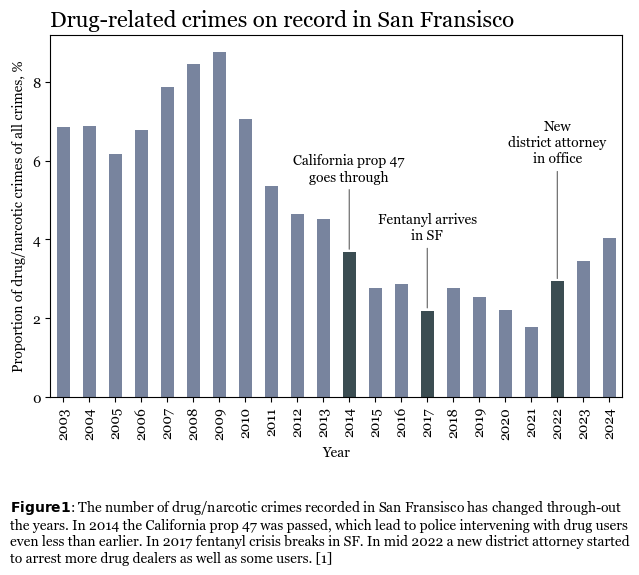

In [37]:
#------------ graph to for an overview---------

years_to_highlight = [2014, 2017, 2022]


bar_colors = ['#3b4d52' if year in years_to_highlight else '#78849e' for year in counts['Year']]
plot = counts.plot(x = 'Year',
                   y = 'Drug/narcotic, normalized',
                   kind = 'bar',
                   legend = False,
                   ylabel = 'Proportion of drug/narcotic crimes of all crimes, %',
                   color = bar_colors)
#title
plot.set_title('Drug-related crimes on record in San Fransisco', loc='left', fontsize=16, weight='normal')
#annotation for the year 2014 to highlight change in legislation
# Get the Y value for 2014
bar_index_14 = counts[counts['Year']==2014].index[0]
y_val_14 = counts.loc[counts['Year']==2014, 'Drug/narcotic, normalized'].values[0]
plot.annotate(
    'California prop 47\ngoes through',
    xy = (bar_index_14, y_val_14),
    xytext = (0, 60),
    textcoords = 'offset points',
    arrowprops = dict(facecolor = 'grey',
                      arrowstyle = '-',
                      #connectionstyle = 'arc3, rad=0.1',
                      linewidth = 0.5
                    ),
    ha = 'center', va = 'center')

#annotation for the year 2017 to highlight fentanyl's arrival in SF
# Get the Y value for 2017
bar_index_17 = counts[counts['Year']==2017].index[0]
y_val_17 = counts.loc[counts['Year']==2017, 'Drug/narcotic, normalized'].values[0]
plot.annotate(
    'Fentanyl arrives\nin SF',
    xy = (bar_index_17, y_val_17),
    xytext = (0, 60),
    textcoords = 'offset points',
    arrowprops = dict(facecolor = 'grey',
                      arrowstyle = '-',
                      #connectionstyle = 'arc3, rad=0.1',
                      linewidth = 0.5
                    ),
    ha = 'center', va = 'center')

#annotation for the year 2022 to highlight a new distirct attorney
# Get the Y value for 2022
bar_index_22 = counts[counts['Year']==2022].index[0]
y_val_22 = counts.loc[counts['Year']==2022, 'Drug/narcotic, normalized'].values[0]
plot.annotate(
    'New\ndistrict attorney\nin office',
    xy = (bar_index_22, y_val_22),
    xytext = (0, 100),
    textcoords = 'offset points',
    arrowprops = dict(facecolor = 'grey',
                      arrowstyle = '-',
                      #connectionstyle = 'arc3, rad=0.1',
                      linewidth = 0.5
                    ),
    ha = 'center', va = 'center')

plt.figtext(
    0.02, -0.05,
    r'$\bf{Figure 1}$: The number of drug/narcotic crimes recorded in San Fransisco has changed through-out the years. In 2014 the California prop 47 was passed, which lead to police intervening with drug users even less than earlier. In 2017 fentanyl crisis breaks in SF. In mid 2022 a new district attorney started to arrest more drug dealers as well as some users. [1]',
    wrap = True,
    horizontalalignment = 'left',
    verticalalignment = 'top',
    fontsize = 10,
    style = 'normal'
)

plt.tight_layout()
plt.savefig("overview.png", dpi=300, bbox_inches='tight', facecolor='white')


In [460]:
#let's look at the neighbourhoods

#counts
counts_area = df_drug.value_counts('PdDistrict').reset_index().reset_index(drop=True)
counts_area.columns = ['PdDistrict', 'Count']
#counts_area.head()
#plot = counts_area.plot(x = 'PdDistrict', y = 'Count', kind = 'bar')

In [461]:
years = list(range(2014, 2025))
districts = counts_area.PdDistrict.unique()

district_dict = {
    district: [] for district in districts
}


for district in district_dict:
    data = df_drug.loc[(df_drug['PdDistrict'] == district) & (df_drug['Year'].isin(years))]
    counts = data.value_counts('Year').reset_index().sort_values(by = 'Year').reset_index(drop = True)
    counts.columns = ['Year', 'Count']
    all_crime_in_district = counts['Count'].sum()
    district_dict[district] = counts

In [462]:
#let's add my district sums into a single dataframe to make life easier
pd_counts_df = pd.DataFrame(index = years)
pd_counts_norm_df = pd.DataFrame(index = years)

for dist in districts:
    data = district_dict[dist]
    year_series = data.set_index('Year')['Count']
    pd_counts_df[dist] = year_series
    pd_counts_norm_df[dist] = year_series / yearly_drug_numbers.set_index('Year')['Count']

pd_counts_norm_df.head()

,TENDERLOIN,SOUTHERN,MISSION,NORTHERN,BAYVIEW,PARK,INGLESIDE,CENTRAL,TARAVAL,RICHMOND
2014,0.229339,0.178625,0.151390,0.114012,0.082081,0.067055,0.054095,0.065552,0.026672,0.031180
2015,0.256795,0.165951,0.153314,0.120410,0.103004,0.059132,0.050548,0.049595,0.026705,0.014545
2016,0.227749,0.217277,0.150643,0.124703,0.076630,0.064969,0.045217,0.049262,0.025464,0.018087
2017,0.223890,0.231240,0.133844,0.156508,0.059112,0.040123,0.050230,0.045023,0.031853,0.028178
2018,0.447704,0.129847,0.147704,0.061224,0.031888,0.033163,0.041582,0.069643,0.020663,0.016582


In [469]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import all_palettes
from bokeh.transform import dodge
from bokeh.layouts import column
from bokeh.models import Legend
from bokeh.models import CheckboxButtonGroup, CustomJS
from bokeh.models import NumeralTickFormatter
from bokeh.models import Panel, Tabs
from bokeh.palettes import Category20
from bokeh.models import Div

from bokeh.palettes import brewer
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.models import HoverTool

import pandas as pd
import numpy as np

output_notebook()
# ── STEP 1: PREPARE DATA ─────────────────────────────────────
# Your DataFrame: pd_counts_norm_df (years as index, districts as columns)
normalized_df = pd_counts_norm_df.copy()
absolute_df = pd_counts_df.copy()
normalized_df.index = normalized_df.index.astype(str)  # Bokeh likes strings for x-axis
years = normalized_df.index.tolist()
districts = normalized_df.columns.tolist()

# ── STEP 2: BOKEH STACKED BAR SETUP ─────────────────────────
# Step 1: Create source with both normalized and absolute
source_data = {
    'years': years
}

for district in districts:
    source_data[district] = normalized_df[district].values  # normalized for plotting
    source_data[f"{district}_value"] = absolute_df[district].values  # for hover

source = ColumnDataSource(data=source_data)

# Pull your muted custom colors
district_colors = {
    'TENDERLOIN': '#3b4d52',
    'SOUTHERN':   '#4a7976',
    'MISSION':    '#b66e52',
    'NORTHERN':   '#78849e',
    'BAYVIEW':    '#d4bfa9',
    'PARK':       '#c1c6b9',
    'INGLESIDE':  '#aabec2',
    'CENTRAL':    '#c8bcb0',
    'TARAVAL':    '#d5cec6',
    'RICHMOND':   '#bfb8ad'
}

district_colors2 = {
    # 🔥 Top 4 (bold, rich, complementary to tomato/firebrick)
    'TENDERLOIN': '#8c2d04',   # burnt sienna / dark clay (bold & earthy)
    'SOUTHERN':   '#01665e',   # deep teal (cool balance to warm reds)
    'MISSION':    '#a63603',   # warm rust — cousin to firebrick
    'NORTHERN':   '#264653',   # desaturated navy

    # 🎨 The rest — muted, airy tones that sit back
    'BAYVIEW':    '#cbbeb5',   # soft warm beige
    'PARK':       '#c5d1cc',   # pale foggy mint
    'INGLESIDE':  '#e3dcd2',   # warm ivory
    'CENTRAL':    '#b4ada3',   # muted stone
    'TARAVAL':    '#d9d4cf',   # very pale clay
    'RICHMOND':   '#cfcfcf'    # whisper grey (very light)
}

district_colors3 = {
    'TENDERLOIN': '#A52A2A',   # dark red/brown
    'SOUTHERN':   '#CD5C5C',    # indian red
    'MISSION':    '#DC143C',    # crimson
    'NORTHERN':   '#B22222',    # firebrick

    'BAYVIEW':    '#FF6B6B',    # light coral
    'PARK':       '#E9967A',    # dark salmon
    'INGLESIDE':  '#FA8072',    # salmon
    'CENTRAL':    '#F08080',    # light coral
    'TARAVAL':    '#FFB6C1',    # light pink
    'RICHMOND':   '#FFA07A'     # light salmon
}
colors = [district_colors[d] for d in districts]

# ── STEP 3: CREATE FIGURE ────────────────────────────────────
p = figure(x_range=years, height=500, width=900,
           title="Drug-related crimes in SF by Police District (2014–2024)",
           toolbar_location="above", tools="pan,wheel_zoom,box_zoom,reset,save")

# Stacked bars
renderers = p.vbar_stack(districts, x='years', width=0.9, color=colors, source=source,
                         legend_label=districts)



# ── STEP 4: TOOLS, STYLING, LEGEND ───────────────────────────

#hover
for district, renderer in zip(districts, renderers):
    hover = HoverTool(
        renderers=[renderer],
        tooltips=[
            ("Year", "@years"),
            (f"District", f"{district}"),
            ("Proportion", f"@{district}{{0.00%}}"),
            ("Number of crimes", f"@{district}_value{{0,0}}")
        ]
    )
    p.add_tools(hover)

#formatting
p.y_range.start = 0
p.yaxis.formatter = NumeralTickFormatter(format="0%")
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None

# Title
p.title.text_font = "Georgia"
p.title.text_font_size = "18pt"
p.title.text_font_style = "normal"
p.title.align = 'left'

#description
caption = Div(text="""
    <p style="font-size:10pt; font-family:Georgia; max-width:800px; margin-top:1em;">
    Figure 2: Drug-related crimes in San Francisco have been heavily concentrated in the Tenderloin district throughout 2014–2024.
    The top 4 police districts (Tenderloin, Southern, Mission, and Northern) consistently report the majority of drug-related incidents.
    Please note that the graph shows relative values, absolute crime can be viewed by hovering.
    </p>
""")

# Reverse renderers and district names to match stack order
reversed_renderers = renderers[::-1]
reversed_districts = districts[::-1]

# Clear existing legend if needed
p.legend.items = []

# Add new legend manually
from bokeh.models import Legend
legend = Legend(items=[
    (name, [r]) for name, r in zip(reversed_districts, reversed_renderers)
])
# Legend
p.legend.label_text_font = "Georgia"
p.legend.location = "top_left"
p.legend.label_text_font_size = "10pt"
p.add_layout( legend, 'right')

# Axis labels
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Proportion of yearly drug-related crimes, %"

layout = column(p, caption)
# ── STEP 5: SHOW and SAVE ─────────────────────────────────────────────
output_file("sf_districts_bokeh.html")
save(layout)

Loading BokehJS ...

'/Users/maijavalimaki/Desktop/DTU_Social_data_course/mvalim165.github.io/sf_districts_bokeh.html'

In [466]:
from bokeh.io import show, output_notebook, output_file, save
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Slider, RadioButtonGroup
from bokeh.palettes import all_palettes
from bokeh.transform import dodge
from bokeh.layouts import column, row
from bokeh.models import Legend
from bokeh.models import CheckboxButtonGroup, CustomJS
from bokeh.models import NumeralTickFormatter
from bokeh.models import Panel, Tabs
from bokeh.models import Div

import pandas as pd
import numpy as np

# ── STEP 1: PREPARE DATA ─────────────────────────────────────
# Assuming pd_counts_norm_df and pd_counts_df are available
# Let's create sample data if they're not available in this context
# (You would replace this with your actual dataframes)



# Continue with your visualization code
normalized_df = pd_counts_norm_df.copy()
absolute_df = pd_counts_df.copy()
normalized_df.index = normalized_df.index.astype(str)
years = normalized_df.index.tolist()
districts = normalized_df.columns.tolist()

#indexes as strings
normalized_df.index = normalized_df.index.astype(str)
absolute_df.index = absolute_df.index.astype(str)
yearly_totals.index = yearly_totals.index.astype(str)

# Calculate yearly totals for reference
yearly_totals = absolute_df.sum(axis=1)



# ── STEP 2: COLOR SCHEMES ─────────────────────────────────
district_colors = {
    'TENDERLOIN': '#3b4d52',
    'SOUTHERN':   '#4a7976',
    'MISSION':    '#b66e52',
    'NORTHERN':   '#78849e',
    'BAYVIEW':    '#d4bfa9',
    'PARK':       '#c1c6b9',
    'INGLESIDE':  '#aabec2',
    'CENTRAL':    '#c8bcb0',
    'TARAVAL':    '#d5cec6',
    'RICHMOND':   '#bfb8ad'
}

district_colors2 = {
    'TENDERLOIN': '#8c2d04',
    'SOUTHERN':   '#01665e',
    'MISSION':    '#a63603',
    'NORTHERN':   '#264653',
    'BAYVIEW':    '#cbbeb5',
    'PARK':       '#c5d1cc',
    'INGLESIDE':  '#e3dcd2',
    'CENTRAL':    '#b4ada3',
    'TARAVAL':    '#d9d4cf',
    'RICHMOND':   '#cfcfcf'
}

district_colors3 = {
    'TENDERLOIN': '#A52A2A',
    'SOUTHERN':   '#CD5C5C',
    'MISSION':    '#DC143C',
    'NORTHERN':   '#B22222',
    'BAYVIEW':    '#FF6B6B',
    'PARK':       '#E9967A',
    'INGLESIDE':  '#FA8072',
    'CENTRAL':    '#F08080',
    'TARAVAL':    '#FFB6C1',
    'RICHMOND':   '#FFA07A'
}

color_schemes = {
    'Original': district_colors,
    'Earth Tones': district_colors2,
    'Red Palette': district_colors3
}

# ── STEP 3: CREATE INTERACTIVE VISUALIZATION FUNCTION ────────────────────────

def create_interactive_plot(color_scheme='Original', view_type='stacked', year_range=(2014, 2024)):
    """
    Create an interactive plot based on the selected parameters
    
    Args:
        color_scheme (str): Which color palette to use
        view_type (str): 'stacked', 'grouped', or 'normalized'
        year_range (tuple): Start and end years to display
    """
    # Filter data for selected year range
    start_year, end_year = year_range
    filtered_years = [str(yr) for yr in range(start_year, end_year + 1)]
    
    # Create a new source with filtered data
    source_data = {'years': filtered_years}
    
    # Get selected color scheme
    colors_dict = color_schemes[color_scheme]
    colors = [colors_dict[d] for d in districts]
    
    # Filter dataframes to selected years
    filtered_norm_df = normalized_df.loc[filtered_years]
    filtered_abs_df = absolute_df.loc[filtered_years]
    
    # Prepare data for the source
    for district in districts:
        source_data[district] = filtered_norm_df[district].values
        source_data[f"{district}_value"] = filtered_abs_df[district].values
        
    # Add yearly totals for reference
    source_data['yearly_total'] = [yearly_totals[years.index(yr)] for yr in filtered_years]
    
    source = ColumnDataSource(data=source_data)
    
    # Create figure
    p = figure(x_range=filtered_years, height=500, width=900,
              title="Drug-related crimes in SF by Police District",
              toolbar_location="above", tools="pan,wheel_zoom,box_zoom,reset,save")
    
    # Different visualization types
    if view_type == 'stacked':
        renderers = p.vbar_stack(districts, x='years', width=0.9, 
                                color=colors, source=source,
                                legend_label=districts)
        
        # Add hover for stacked bars
        for district, renderer in zip(districts, renderers):
            hover = HoverTool(
                renderers=[renderer],
                tooltips=[
                    ("Year", "@years"),
                    ("District", f"{district}"),
                    ("Proportion", f"@{district}{{0.00%}}"),
                    ("Number of crimes", f"@{district}_value{{0,0}}"),
                    ("Total crimes", "@yearly_total{0,0}")
                ]
            )
            p.add_tools(hover)
            
        # Y-axis as percentage for stacked view
        p.yaxis.formatter = NumeralTickFormatter(format="0%")
        p.yaxis.axis_label = "Proportion of yearly drug-related crimes"
            
    elif view_type == 'grouped':
        # Calculate the width for each bar in the group
        width = 0.8 / len(districts)
        
        renderers = []
        for i, district in enumerate(districts):
            # Position each district's bars with dodge
            x_dodge = -0.4 + (i + 0.5) * width
            r = p.vbar(x=dodge('years', x_dodge, range=p.x_range), 
                      top=district, width=width * 0.9, 
                      source=source, color=colors_dict[district],
                      legend_label=district)
            renderers.append(r)
            
            # Add hover for grouped bars
            hover = HoverTool(
                renderers=[r],
                tooltips=[
                    ("Year", "@years"),
                    ("District", f"{district}"),
                    ("Proportion", f"@{district}{{0.00%}}"),
                    ("Number of crimes", f"@{district}_value{{0,0}}"),
                    ("Total crimes", "@yearly_total{0,0}")
                ]
            )
            p.add_tools(hover)
            
        # Y-axis as percentage for grouped view
        p.yaxis.formatter = NumeralTickFormatter(format="0%")
        p.yaxis.axis_label = "Proportion of yearly drug-related crimes"
        
    elif view_type == 'absolute':
        # For absolute values, use individual non-stacked bars per district
        renderers = []
        for district in districts:
            r = p.vbar(x='years', top=f"{district}_value", width=0.9, 
                      source=source, color=colors_dict[district],
                      legend_label=district, alpha=0.7)
            renderers.append(r)
            
            # Add hover for absolute values
            hover = HoverTool(
                renderers=[r],
                tooltips=[
                    ("Year", "@years"),
                    ("District", f"{district}"),
                    ("Number of crimes", f"@{district}_value{{0,0}}"),
                    ("Total crimes", "@yearly_total{0,0}")
                ]
            )
            p.add_tools(hover)
            
        # Y-axis as actual numbers for absolute view
        p.yaxis.formatter = NumeralTickFormatter(format="0,0")
        p.yaxis.axis_label = "Number of drug-related crimes"
    
    # Common styling
    p.xgrid.grid_line_color = None
    p.axis.minor_tick_line_color = None
    p.outline_line_color = None
    
    # Title
    p.title.text_font = "Georgia"
    p.title.text_font_size = "18pt"
    p.title.text_font_style = "normal"
    p.title.align = 'left'
    
    # Format the time range in the title
    p.title.text = f"Drug-related crimes in SF by Police District ({start_year}–{end_year})"
    
    # Axis labels
    p.xaxis.axis_label = "Year"
    
    # Legend
    p.legend.location = "top_right"
    p.legend.click_policy = "hide"  # Allow clicking on legend to hide/show items
    p.legend.label_text_font = "Georgia"
    p.legend.label_text_font_size = "10pt"
    
    # Caption
    caption = Div(text=f"""
        <p style="font-size:10pt; font-family:Georgia; max-width:800px; margin-top:1em;">
        Figure: Drug-related crimes in San Francisco ({start_year}–{end_year}). Data shown in {view_type} format with the {color_scheme} color scheme.
        The top 4 police districts (Tenderloin, Southern, Mission, and Northern) consistently report the majority of drug-related incidents.
        </p>
    """)
    
    return p, caption

# ── STEP 4: CREATE INTERACTIVE CONTROLS ────────────────────────

# Color scheme selector
color_selector = Select(title="Color Scheme:", 
                       value="Original", 
                       options=list(color_schemes.keys()))

# View type selector
view_selector = Select(title="View Type:", 
                      value="stacked", 
                      options=["stacked", "grouped", "absolute"])

# Year range slider
year_slider = Slider(title="Start Year", value=2014, start=2014, end=2023, step=1)
end_year_slider = Slider(title="End Year", value=2024, start=2015, end=2024, step=1)

# Information header
header = Div(text="""
    <h2 style="font-family:Georgia;">Interactive San Francisco Drug-Related Crime Data</h2>
    <p style="font-family:Georgia;">Explore drug-related crimes across SF districts with interactive controls below.</p>
    <p style="font-family:Georgia; font-size:12px;">
       <b>View Types:</b><br>
       • <b>Stacked</b>: Shows proportional distribution across districts<br>
       • <b>Grouped</b>: Compares proportions side-by-side<br>
       • <b>Absolute</b>: Shows actual crime numbers
    </p>
    <hr>
""")

# ── STEP 5: INTERACTIVITY CALLBACKS ─────────────────────────────────

def update_plot():
    year_range = (year_slider.value, end_year_slider.value)
    
    # Validate year range
    if year_range[0] >= year_range[1]:
        year_range = (year_range[0], year_range[0] + 1)
        end_year_slider.value = year_range[1]
    
    new_plot, new_caption = create_interactive_plot(
        color_scheme=color_selector.value,
        view_type=view_selector.value,
        year_range=year_range
    )
    
    # Update layout
    layout.children[1] = row(new_plot)
    layout.children[2] = new_caption

# Connect callbacks
color_selector.on_change('value', lambda attr, old, new: update_plot())
view_selector.on_change('value', lambda attr, old, new: update_plot())
year_slider.on_change('value', lambda attr, old, new: update_plot())
end_year_slider.on_change('value', lambda attr, old, new: update_plot())

# ── STEP 6: CREATE INITIAL PLOT AND LAYOUT ───────────────────────

initial_plot, initial_caption = create_interactive_plot()

# Arrange controls in a row
controls = row(color_selector, view_selector, year_slider, end_year_slider)

# Create layout
layout = column(
    header,
    row(initial_plot),
    initial_caption,
    controls
)

# ── STEP 7: OUTPUT ───────────────────────────────────────────────

output_file("sf_districts_interactive.html")
save(layout)

# For notebooks
# output_notebook()
# show(layout)

/var/folders/nm/8h6trdzs11b4x2t2ypm38l0w0000gn/T/ipykernel_16392/161725646.py:118: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_data['yearly_total'] = [yearly_totals[years.index(yr)] for yr in filtered_years]
You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



'/Users/maijavalimaki/Desktop/DTU_Social_data_course/mvalim165.github.io/sf_districts_interactive.html'

### Drafts and sketches

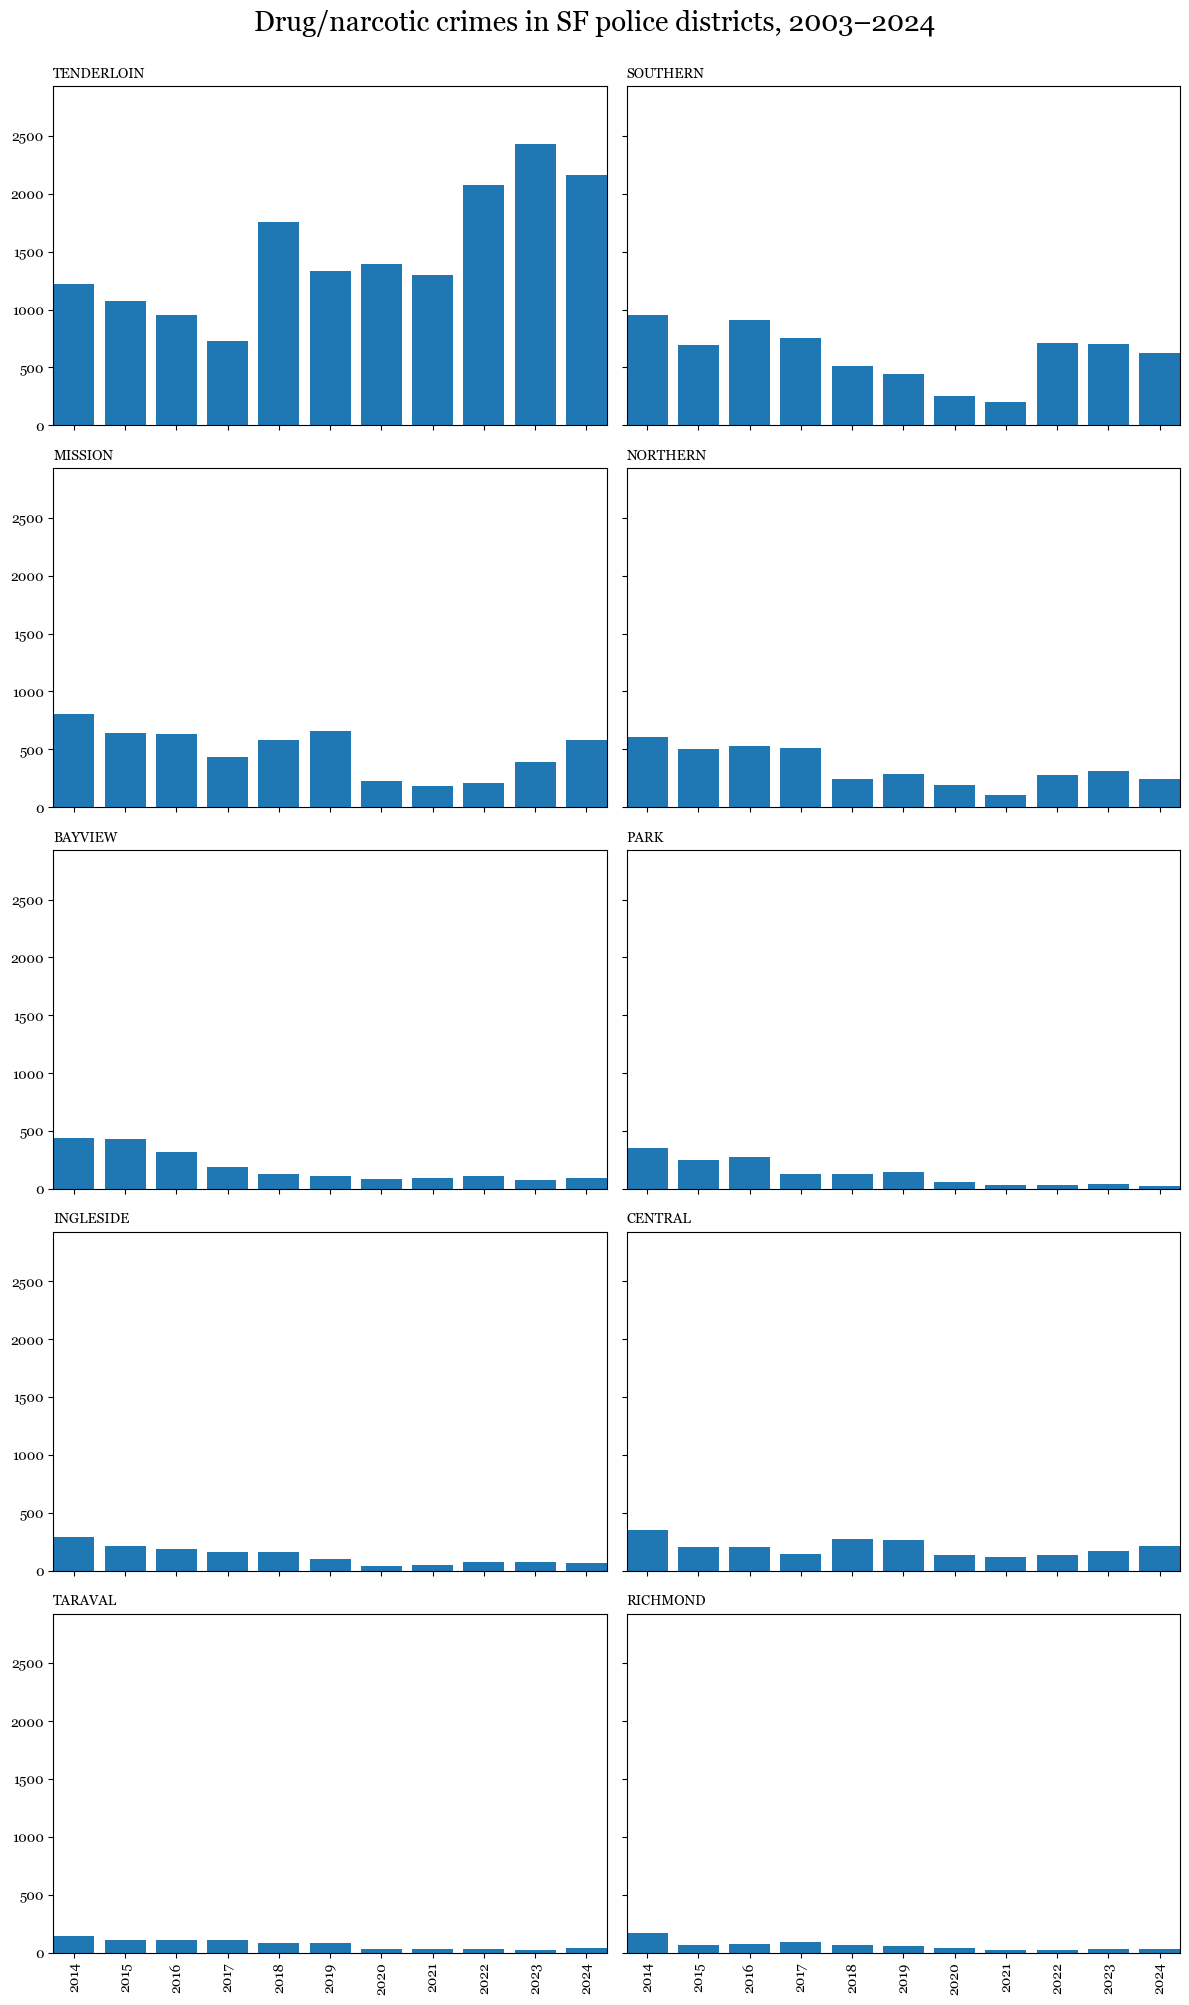

In [444]:
#time to plot

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12,20), sharex = True, sharey = True)
years = list(range(2014, 2025))
max_y = max([district_dict[d]['Count'].max() for d in districts])

for i, ax in enumerate(axes.flatten()):
    dist = districts[i]
    data = district_dict[dist]
    x = data['Year']
    y = data['Count']

    ax.bar(x, y, width = 0.8, align = 'center', label = dist)
    ax.set_xmargin(0)
    ax.set_ymargin(0.5)

    ax.set_ylim(0, max_y + 500)
    ax.set_title(dist, fontsize = 10, loc = 'left')
    ax.set_xticks(years) #setting my owns
    ax.set_xticklabels(years, rotation = 90)

plt.suptitle('Drug/narcotic crimes in SF police districts, 2003–2024', fontsize=20, y=1)
plt.tight_layout()
 

In [45]:
#Weekly 168 h cycle
l = len(focus_crimes)
hour_counts = pd.DataFrame()

for i in range(l):
    data = df[df.Category == focus_crimes[i]]
    hour_count = data.value_counts('HourOfWeek').reset_index()
    hour_count.columns = ['HourOfWeek', focus_crimes[i]]
    hour_count = hour_count.sort_values(by = 'HourOfWeek').reset_index(drop=True)
    hour_counts[focus_crimes[i]] = hour_count[focus_crimes[i]]
hour_counts.head()

,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
0,1649,892,586,4191,208,524,115,1365,958,243
1,1496,588,351,2486,152,564,68,922,585,178
2,1279,704,273,1561,116,533,68,878,452,148
3,643,775,228,1137,76,291,43,664,346,98
4,435,765,154,772,56,223,49,454,282,84


In [43]:
#creating the pairs for the options
other_crimes = [
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY']
pairs = [('DRUG/NARCOTIC', crime) for crime in other_crimes]
print(pairs)


[('DRUG/NARCOTIC', 'WEAPON LAWS'), ('DRUG/NARCOTIC', 'PROSTITUTION'), ('DRUG/NARCOTIC', 'ROBBERY'), ('DRUG/NARCOTIC', 'BURGLARY'), ('DRUG/NARCOTIC', 'ASSAULT'), ('DRUG/NARCOTIC', 'LARCENY/THEFT'), ('DRUG/NARCOTIC', 'VANDALISM'), ('DRUG/NARCOTIC', 'VEHICLE THEFT'), ('DRUG/NARCOTIC', 'STOLEN PROPERTY')]


In [44]:
#defining a function to calculate R2
def get_R2(y, p):
    n = len(x)
    y_mean = 1/n * sum(y)
    SSres = sum((y-p)**2)
    SStot = sum((y-y_mean)**2)
    R2 = 1 - (SSres/SStot)

    return R2

In [59]:
# Initial source data
source = ColumnDataSource(hour_counts)
full_data = hour_counts.to_dict(orient='list')
# Plot
p = figure(height=400, width=600, title="Compare with DRUG/NARCOTIC")
p.scatter('DRUG/NARCOTIC', 'ASSAULT', size=10, source=source)
p.xaxis.axis_label = 'DRUG/NARCOTIC'
p.yaxis.axis_label = 'selected other crime'


# Dropdown selector
select = Select(title="Compare to:", value="ASSAULT", options=other_crimes)

# JavaScript callback to update plot
select.js_on_change('value', CustomJS(args=dict(source=source, full_data=full_data), code="""
    const selected = cb_obj.value;
    source.data['y'] = full_data[selected];
    source.change.emit();
"""))

layout = column(select, p)
output_file("interactive_crime_compare.html")
show(layout)

Text(0.0, 1.0, 'Drug-related crimes in San Fransisco by Police District (2014–2024)')

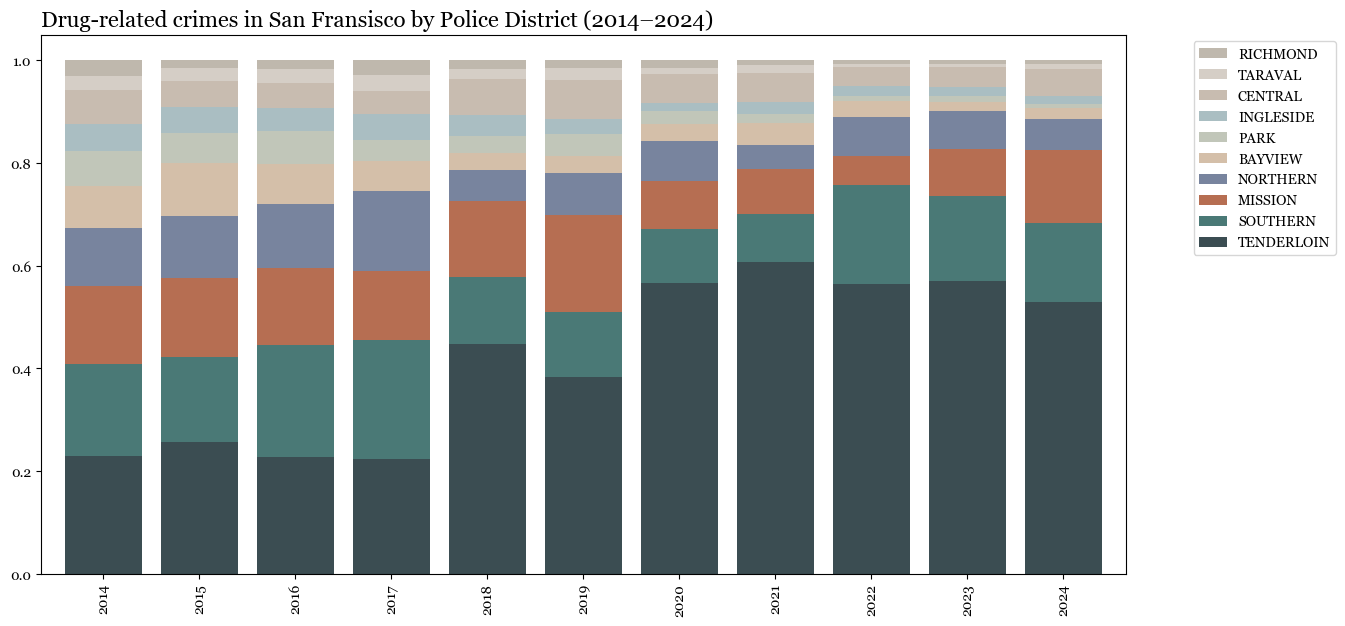

In [389]:
#-------static graph
# Custom color map — highlight top 4
district_colors = {
    'TENDERLOIN': '#3b4d52',   # desaturated navy
    'SOUTHERN':   '#4a7976',   # dusty pine green
    'MISSION':    '#b66e52',   # muted clay/rust
    'NORTHERN':   '#78849e',   # dusty slate blue

    'BAYVIEW':    '#d4bfa9',   # muted tan
    'PARK':       '#c1c6b9',   # sage-grey
    'INGLESIDE':  '#aabec2',   # dusty seafoam
    'CENTRAL':    '#c8bcb0',   # greige
    'TARAVAL':    '#d5cec6',   # pale clay
    'RICHMOND':   '#bfb8ad'    # soft taupe
}
colors = [district_colors[d.upper()] for d in pd_counts_norm_df.columns]

pd_counts_norm_df.plot(
    kind = 'bar',
    stacked = True,
    figsize = (14,7),
    width = 0.8,
    color = colors,
    legend = False,
)

handels, labels = plt.gca().get_legend_handles_labels()
plt.legend(
        handels[::-1],
        labels[::-1],
        bbox_to_anchor = (1.2, 1),
        loc = 'upper right'
)

plt.title('Drug-related crimes in San Fransisco by Police District (2014–2024)', fontsize = 16, loc = 'left')

#adding a line to show that Tenderloin always dominates
#min_tenderloin = pd_counts_norm_df['TENDERLOIN'].min()
#plt.axhline(y = min_tenderloin, color = 'navy', linestyle = '--', linewidth = 2, alpha = 0.50)

    

In [35]:
#-------- Maija's sketch

#prepping to calculate the statistic for my bokeh thingy

df = mdata[(mdata['Category'].isin(focus_crimes))].reset_index(drop=True)

#initiating the weekly hours to the dataset
#to count for the weekly hours, let's create a new column to the dataset with the info about the weekhour

df.loc[:,'Weekday number'] = mdata['DayOfWeek'].replace({
   'Monday': 0,
    'Tuesday':1, 
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6})

df.loc[:,'HourOfWeek'] = df['Weekday number']* 24 + df['TimeOfDay']

print('Focus crimes data has been saved as df. It includes all full years. In addition, a column for the hour of week has been added.')
df.head()

Focus crimes data has been saved as df. It includes all full years. In addition, a column for the hour of week has been added.


/var/folders/nm/8h6trdzs11b4x2t2ypm38l0w0000gn/T/ipykernel_32903/2438275899.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:,'Weekday number'] = mdata['DayOfWeek'].replace({


,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,Weekday number,HourOfWeek
0,ROBBERY,INGLESIDE,-122.420084,37.708311,2004-11-22,17:50,17,Monday,22,November,2004,0,17
1,VEHICLE THEFT,PARK,-120.500000,90.000000,2005-10-18,20:00,20,Tuesday,18,October,2005,1,44
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2004-02-15,02:00,2,Sunday,15,February,2004,6,146
3,ASSAULT,SOUTHERN,-122.410541,37.770913,2010-11-21,17:00,17,Sunday,21,November,2010,4,113
4,ASSAULT,TARAVAL,-122.470366,37.745158,2013-04-02,15:50,15,Tuesday,2,April,2013,6,159


/var/folders/nm/8h6trdzs11b4x2t2ypm38l0w0000gn/T/ipykernel_16392/3406951393.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counts_2022.loc[:, 'Month number'] = counts_2022['Month'].replace({


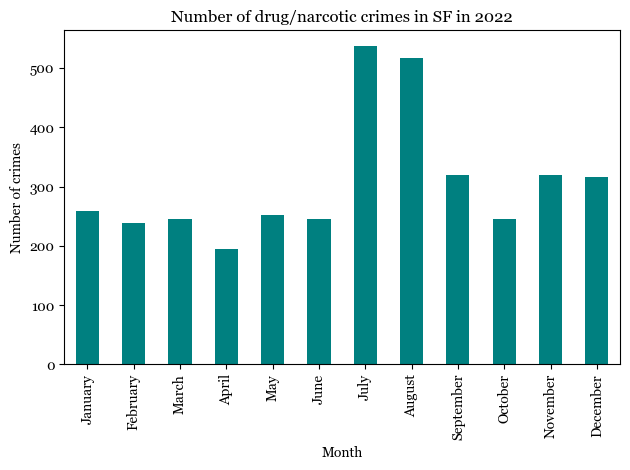

In [442]:
#------2022 more specifically-----

df_drug_2022 = df_drug[df_drug['Year']==2022].reset_index(drop=True)
#counts
counts_2022 = df_drug_2022.value_counts('Month').reset_index().reset_index(drop=True)
counts_2022.columns = ['Month', 'Count']
counts_2022.loc[:, 'Month number'] = counts_2022['Month'].replace({
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
})
counts_2022 = counts_2022.sort_values(by='Month number').reset_index(drop=True)
plot = counts_2022.plot(x = 'Month',
                        y = 'Count',
                        kind = 'bar',
                        title = 'Number of drug/narcotic crimes in SF in 2022',
                        ylabel = 'Number of crimes',
                        legend = False,
                        color = 'teal')
plt.tight_layout()
plt.show()